In [108]:
import pandas as pd 
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from itertools import combinations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.api import VAR
from statsmodels.tsa.api import VARMAX 
from scipy.stats import pearsonr
import sys
import sympy 
sys.path.insert(1, '../Merging_Data')

import WranglerFunctions as wf
import FullDataset as fd
import math

# VARMA Model

<b>Referes to</b> 
<ul>
    <li><a>https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/ </a></li>
    <li><a>https://youtu.be/7_Js8h709Dw</a></li>
    <li><a>https://youtu.be/6Ye0CsfRDJg</a></li>
    <li><a>https://www.statsmodels.org/stable/examples/notebooks/generated/statespace_varmax.html#Caution:-VARMA(p,q)-specifications</a></li>
    

Stands for Vector Autoregressive Intergrated Moving average <br>

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:
<ul>
    <li><b>V:</b> Vector. Allows for multiple variables to be taken into account.
    </li>
    <li><b>AR:</b> Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
    </li><li><b>MA: </b>Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.
    </li></ul>
    
<br> Standard notation is used of VARMA(p,d,q)

The parameters of the VARMA model are defined as follows:
<ul>
<li><b>p:</b> The number of lag observations included in the model, also called the lag order.
</li><li><b>q:</b> The size of the moving average window, also called the order of moving average. </li></ul>

## Cleanin Time Series Data

In [109]:
#Getting combine dataset

AAL_merged_df = pd.read_csv('../../Notebooks/Datasets/Merged_Dataset/AAL LN Equity_merged_features.csv')
ANTO_merged_df = pd.read_csv('../../Notebooks/Datasets/Merged_Dataset/ANTO LN Equity_merged_features.csv')
BHP_merged_df = pd.read_csv('../../Notebooks/Datasets/Merged_Dataset/BHP LN Equity_merged_features.csv')
EVR_merged_df = pd.read_csv('../../Notebooks/Datasets/Merged_Dataset/EVR LN Equity_merged_features.csv')
GLEN_merged_df = pd.read_csv('../../Notebooks/Datasets/Merged_Dataset/GLEN LN Equity_merged_features.csv')
RIO_merged_df = pd.read_csv('../../Notebooks/Datasets/Merged_Dataset/RIO LN Equity_merged_features.csv')

companies_financial_dataset = pd.read_csv('../../Notebooks/Datasets/Financial_dataset/F3METL_Comp.csv', index_col = False)
companies_financial_dataset = wf.F3Metl_Comp_Wrangler(companies_financial_dataset)


In [110]:
AAL_merged_df

,Unnamed: 0,Date,EBITDA,CL1_COMB_Comodity_PX_LAST,LMAHDS03_LME_Comdty_PX_LAST,LMPBDS03_LME_Comdty_PX_LAST,LMSNDS03_LME_Comdty_PX_LAST,LMCADS03_LME_Comdty_PX_LAST,LMNIDS03_LME_Comdty_PX_LAST,LMCODY_LME_Comdty_PX_LAST,...,SPX500 Index PX_VOLUME,F3METL_PX_LAST,F3METL_PX_VOLUME,GUKG10 Index PX_LAST,BCOMIN_PX_LAST,UK_GDP growth,China_GDP growth,Japan_GDP growth,USA_GDP growth,Shipping costs_Shipping costs
0,0,2000-01-04,1118,25.60,1650.00,495.5,6125.0,1169.92932,5250.27881,39125.0,...,1.072386e+09,4188.60,9624338.0,5.662,80.1822,1.0,2.4,7.0,1.5,998.2346
1,1,2000-06-30,1438,32.50,1580.00,449.0,5510.0,1180.81665,5310.37646,39125.0,...,1.258792e+09,2323.00,9624338.0,5.171,76.2545,0.6,2.4,1.9,7.5,998.2346
2,2,2001-01-01,1858,26.80,1565.00,483.0,5195.0,1223.13721,4559.14844,39125.0,...,1.318392e+09,1697.10,9624338.0,4.881,74.5400,0.9,2.4,3.0,-1.3,998.2346
3,3,2001-07-02,1843,26.25,1473.00,453.0,4625.0,1108.59253,4278.52930,39125.0,...,1.256211e+09,1480.40,9624338.0,5.302,66.0225,0.5,2.4,-4.3,-1.6,998.2346
4,4,2001-12-31,1813,19.84,1355.00,497.0,3940.0,1023.74707,3848.54346,39125.0,...,1.089302e+09,1733.20,9624338.0,5.054,58.5132,0.2,2.4,-1.4,1.1,998.2346
5,5,2002-07-01,1649,26.86,1388.00,461.0,4460.0,1104.12988,4686.17041,39125.0,...,1.590400e+09,2112.30,21369987.0,5.010,63.8257,0.7,2.4,1.3,1.6,998.2346
6,6,2002-12-31,1840,31.20,1350.00,436.0,4280.0,968.64325,4427.19629,39125.0,...,1.084224e+09,656.00,2508529.0,4.374,59.2308,0.9,2.4,1.1,0.5,998.2346
7,7,2003-06-30,1632,30.19,1365.00,479.0,4650.0,1001.33105,4967.32813,39125.0,...,1.353031e+09,2427.00,37377019.0,4.157,62.0931,0.8,2.4,2.8,3.6,998.2346
8,8,2003-12-31,1728,32.52,1600.00,724.0,6525.0,1290.23218,9251.99023,39125.0,...,8.362977e+08,4854.00,11824331.0,4.802,84.1474,0.8,2.4,4.4,4.7,998.2346
9,9,2004-06-30,2721,37.05,1722.00,837.0,8760.0,1460.53796,8363.64648,39125.0,...,1.131464e+09,6431.60,25382600.0,5.099,88.8250,0.5,2.4,0.1,3.2,998.2346


Code Settings

In [150]:
#company Name
company_name = "AAL"

#Used as the divider for the train test dataset split
test_train_div = 4

#Selected column names below 
#df = AAL_merged_df.loc[:,AAL_merged_df.columns[1:]]

pickable_columns= np.array(['LMCADS03_LME_Comdty_PX_LAST','LMNIDS03_LME_Comdty_PX_LAST','LTBMPRIN_Index_PX_LAST','Inflation Rate','SPX500 Index PX_LAST','SPX500 Index PX_VOLUME','GUKG10 Index PX_LAST','Shipping costs_Shipping costs'])
#pickable_columns = pickable_columns[:7]
print(pickable_columns)
#comb = [i for i in combinations(pickable_columns,)]
#comb = np.array(comb[0])
#print(comb)
#print(len(comb))

input_columns = np.concatenate((['Date', 'EBITDA'],pickable_columns), axis=None)
#input_columns_without_date = np.concatenate((['EBITDA'],pickable_columns), axis=None)
df = AAL_merged_df.loc[:,input_columns]

inital_df = df
num_columns = len(df.columns)
inital_df

['LMCADS03_LME_Comdty_PX_LAST' 'LMNIDS03_LME_Comdty_PX_LAST'
 'LTBMPRIN_Index_PX_LAST' 'Inflation Rate' 'SPX500 Index PX_LAST'
 'SPX500 Index PX_VOLUME' 'GUKG10 Index PX_LAST'
 'Shipping costs_Shipping costs']


,Date,EBITDA,LMCADS03_LME_Comdty_PX_LAST,LMNIDS03_LME_Comdty_PX_LAST,LTBMPRIN_Index_PX_LAST,Inflation Rate,SPX500 Index PX_LAST,SPX500 Index PX_VOLUME,GUKG10 Index PX_LAST,Shipping costs_Shipping costs
0,2000-01-04,1118,1169.92932,5250.27881,100.00,1.1,1399.42,1.072386e+09,5.662,998.2346
1,2000-06-30,1438,1180.81665,5310.37646,100.00,0.8,1454.60,1.258792e+09,5.171,998.2346
2,2001-01-01,1858,1223.13721,4559.14844,100.00,0.8,1320.28,1.318392e+09,4.881,998.2346
3,2001-07-02,1843,1108.59253,4278.52930,100.00,1.7,1236.71,1.256211e+09,5.302,998.2346
4,2001-12-31,1813,1023.74707,3848.54346,100.00,1.1,1148.08,1.089302e+09,5.054,998.2346
5,2002-07-01,1649,1104.12988,4686.17041,100.00,0.6,968.65,1.590400e+09,5.010,998.2346
6,2002-12-31,1840,968.64325,4427.19629,100.00,1.7,879.82,1.084224e+09,4.374,998.2346
7,2003-06-30,1632,1001.33105,4967.32813,100.00,1.1,974.50,1.353031e+09,4.157,998.2346
8,2003-12-31,1728,1290.23218,9251.99023,100.00,1.3,1111.92,8.362977e+08,4.802,998.2346
9,2004-06-30,2721,1460.53796,8363.64648,100.00,1.6,1140.84,1.131464e+09,5.099,998.2346


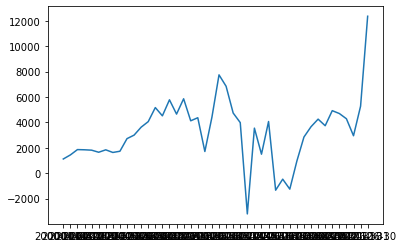

In [112]:
#plot for EBITDA
plt.plot(df['Date'],df['EBITDA'])
plt.show()

Done


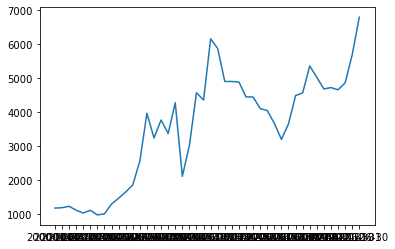

Done


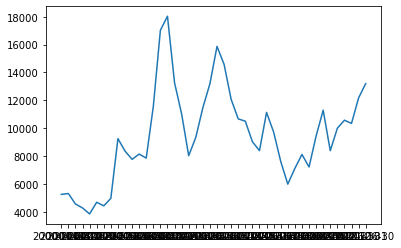

Done


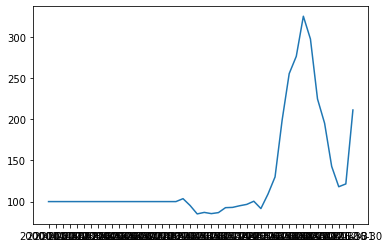

Done


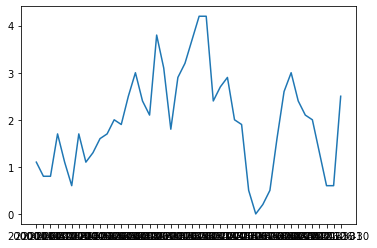

Done


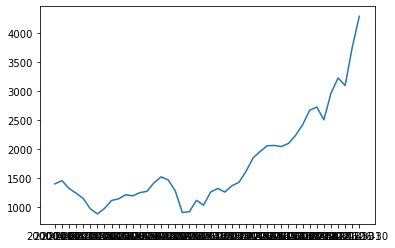

Done


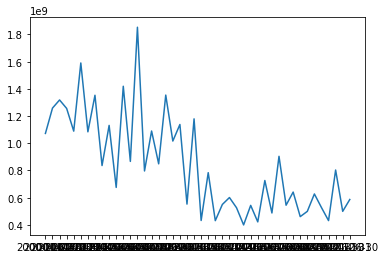

Done


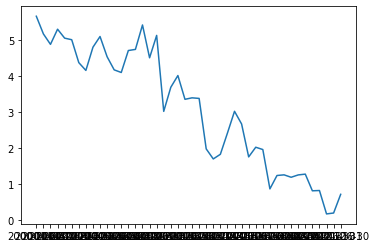

Done


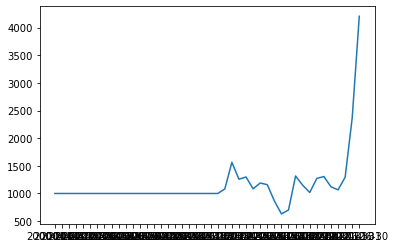

In [113]:
#plot for EBITDA
for i in range(2,num_columns,1):
    print("Done")
    plt.figure()
    plt.plot(df['Date'],df[df.columns[i]])
    plt.show()
    

### Normalize

In [114]:
#get average and standard deviation 
for i in range(1,num_columns,1):
    avg,dev = df[df.columns[i]].mean(), df[df.columns[i]].std()
    df[df.columns[i]] = (df[df.columns[i]] - avg)/dev

Done


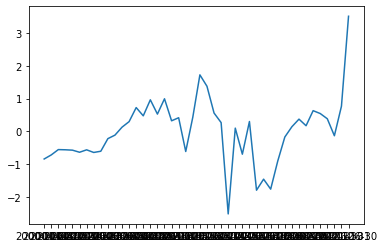

Done


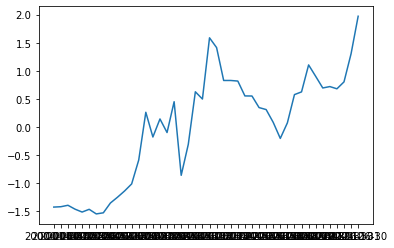

Done


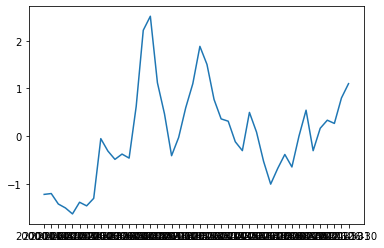

Done


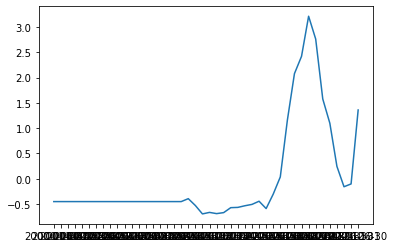

Done


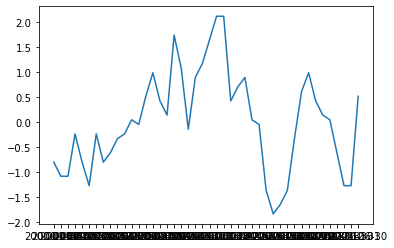

Done


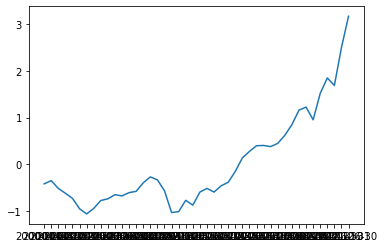

Done


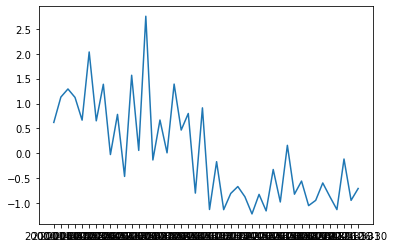

Done


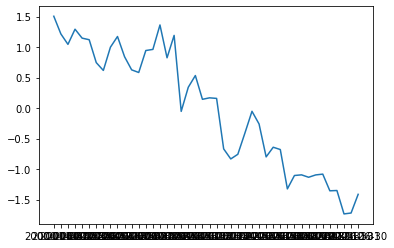

Done


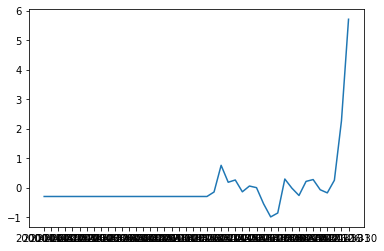

In [115]:
for i in range(1,num_columns,1):
    print("Done")
    plt.figure()
    plt.plot(df['Date'],df[df.columns[i]])
    plt.show()

### Dealing with staionary issues

1. Take the first difference, fixes it around zero

In [116]:
for i in range(1,num_columns,1):
    df[df.columns[i]] = df[df.columns[i]].diff().dropna()
df

,Date,EBITDA,LMCADS03_LME_Comdty_PX_LAST,LMNIDS03_LME_Comdty_PX_LAST,LTBMPRIN_Index_PX_LAST,Inflation Rate,SPX500 Index PX_LAST,SPX500 Index PX_VOLUME,GUKG10 Index PX_LAST,Shipping costs_Shipping costs
0,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-06-30,0.123740,0.006573,0.017571,0.000000,-0.282746,0.068250,0.509747,-0.289769,0.000000
2,2001-01-01,0.162408,0.025551,-0.219634,0.000000,0.000000,-0.166135,0.162984,-0.171147,0.000000
3,2001-07-02,-0.005800,-0.069155,-0.082044,0.000000,0.848239,-0.103364,-0.170042,0.248458,0.000000
4,2001-12-31,-0.011601,-0.051225,-0.125714,0.000000,-0.565493,-0.109623,-0.456430,-0.146360,0.000000
5,2002-07-01,-0.063417,0.048530,0.244895,0.000000,-0.471244,-0.221929,1.370305,-0.025967,0.000000
6,2002-12-31,0.073857,-0.081799,-0.075716,0.000000,1.036737,-0.109870,-1.384191,-0.375343,0.000000
7,2003-06-30,-0.080431,0.019735,0.157917,0.000000,-0.565493,0.117106,0.735081,-0.128065,0.000000
8,2003-12-31,0.037122,0.174422,1.252694,0.000000,0.188498,0.169969,-1.413062,0.380654,0.000000
9,2004-06-30,0.383980,0.102821,-0.259722,0.000000,0.282746,0.035770,0.807162,0.175278,0.000000


#### 2. Dealing with the increasing volatlity problem

In [117]:
#take the standard deviation within each year
#divde each month by the standard deviation of its year
#Forms a series thats the same length of the data but calucate the standard devation of the year for that data point
for i in range(1,num_columns,1):
    anual_volatility = df[df.columns[i]].groupby(pd.DatetimeIndex(df['Date']).year).std()
    annual_vol = df['Date'].map(lambda d: anual_volatility.loc[pd.to_datetime(d).year])
    print(len(df.dropna()))
    df[df.columns[i]] = df[df.columns[i]] /annual_vol
    #df[df.columns[i]].replace([np.inf, -np.inf], np.nan, inplace=True)
    #df[df.columns[i]] = df[df.columns[i]].fillna(method='ffill', limit=1)
df    

43
38
38
38
22
22
22
22
22


,Date,EBITDA,LMCADS03_LME_Comdty_PX_LAST,LMNIDS03_LME_Comdty_PX_LAST,LTBMPRIN_Index_PX_LAST,Inflation Rate,SPX500 Index PX_LAST,SPX500 Index PX_VOLUME,GUKG10 Index PX_LAST,Shipping costs_Shipping costs
0,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001-01-01,1.643272,0.507888,-3.123888,NaN,0.000000,-4.804942,0.525755,-0.726954,NaN
3,2001-07-02,-0.058688,-1.374647,-1.166920,NaN,1.192079,-2.989495,-0.548522,1.055337,NaN
4,2001-12-31,-0.117377,-1.018228,-1.788042,NaN,-0.794719,-3.170503,-1.472358,-0.621671,NaN
5,2002-07-01,-0.653327,0.526607,1.080232,NaN,-0.441942,-2.800798,0.703542,-0.105110,NaN
6,2002-12-31,0.760887,-0.887606,-0.333982,NaN,0.972272,-1.386585,-0.710671,-1.519324,NaN
7,2003-06-30,-0.967620,0.180426,0.203994,NaN,-1.060660,3.132844,0.483935,-0.356014,NaN
8,2003-12-31,0.446594,1.594639,1.618208,NaN,0.353553,4.547057,-0.930279,1.058199,NaN
9,2004-06-30,1.961332,18.003425,-4.345918,NaN,2.121320,0.970091,0.555732,0.488966,NaN


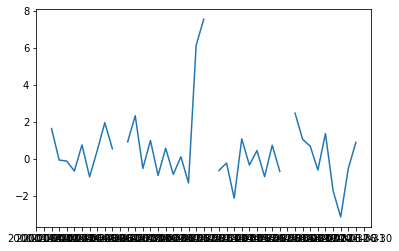

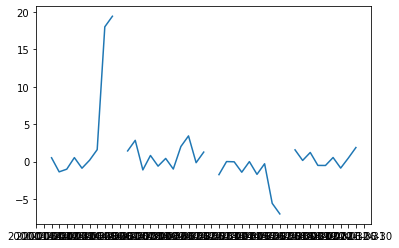

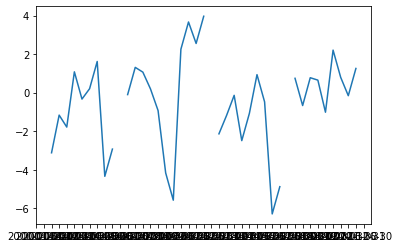

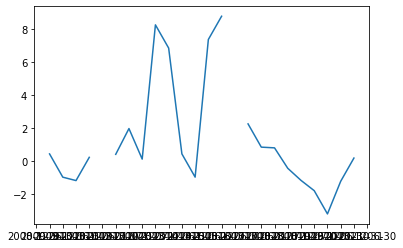

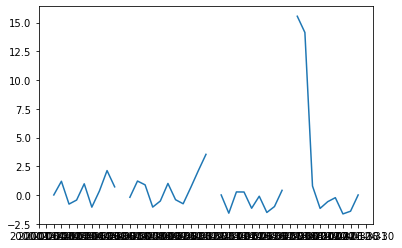

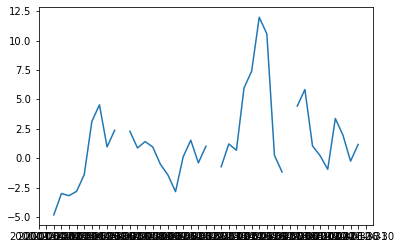

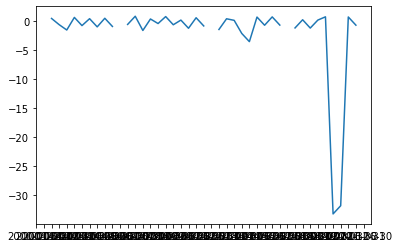

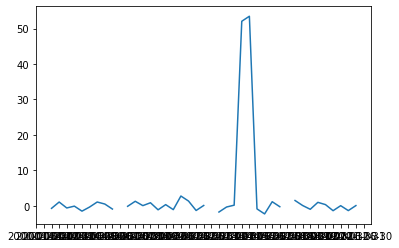

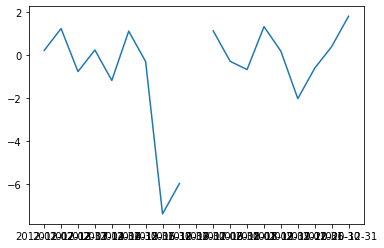

In [118]:
for i in range(1,num_columns,1):
    plt.figure()
    plt.plot(df['Date'],df[df.columns[i]])
    plt.show()

### Removing Seasonality

Here we get the average of the data point each year.Then we create a time series of the same lenght where the average. We then take the current series then subtract this average.

To change to fit our data we would use quarters instead of months. 

In [119]:
#mean of quaters 
for i in range(1,num_columns,1):
    month_avgs = df[df.columns[i]].groupby(pd.DatetimeIndex(df['Date']).month).mean()
    month_spread = df['Date'].map(lambda d: month_avgs.loc[pd.to_datetime(d).month])
    df[df.columns[i]] = df[df.columns[i]] - month_spread

df

,Date,EBITDA,LMCADS03_LME_Comdty_PX_LAST,LMNIDS03_LME_Comdty_PX_LAST,LTBMPRIN_Index_PX_LAST,Inflation Rate,SPX500 Index PX_LAST,SPX500 Index PX_VOLUME,GUKG10 Index PX_LAST,Shipping costs_Shipping costs
0,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001-01-01,0.877472,0.200274,-2.660494,NaN,-2.835520,-5.421436,1.387606,-0.374158,NaN
3,2001-07-02,0.108190,-1.170625,-1.065208,NaN,1.626029,-3.846178,4.314154,-6.527959,NaN
4,2001-12-31,-0.199060,-2.041113,-1.263930,NaN,-0.810416,-4.593351,1.398982,-3.864535,NaN
5,2002-07-01,-0.486448,0.730630,1.181943,NaN,-0.007992,-3.657481,5.566219,-7.688406,NaN
6,2002-12-31,0.679203,-1.910491,0.190130,NaN,0.956576,-2.809433,2.160669,-4.762188,NaN
7,2003-06-30,-2.158560,-1.481937,1.042433,NaN,-2.684545,1.015543,-0.147969,-0.565897,NaN
8,2003-12-31,0.364910,0.571755,2.142319,NaN,0.337857,3.124210,1.941061,-2.184665,NaN
9,2004-06-30,0.770392,16.341062,-3.507479,NaN,0.497435,-1.147209,-0.076172,0.279083,NaN


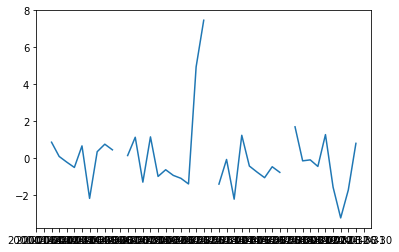

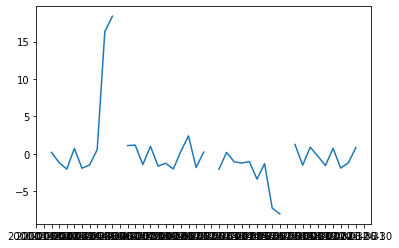

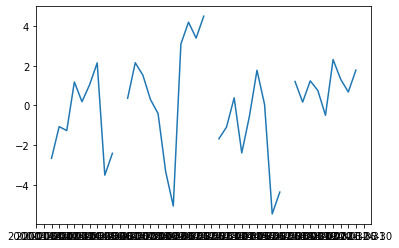

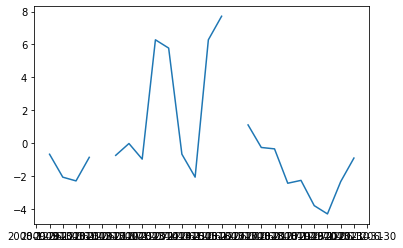

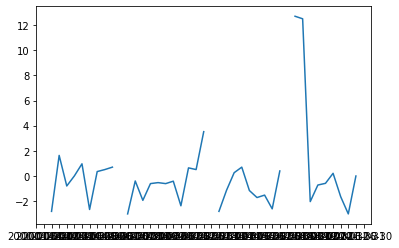

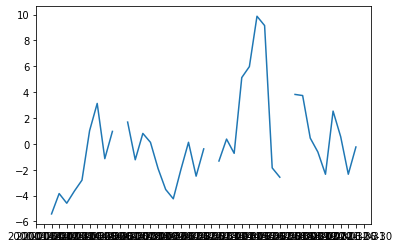

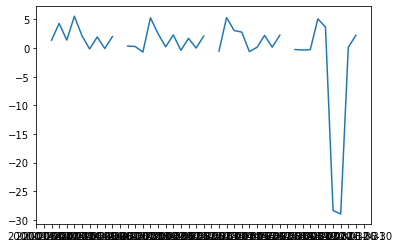

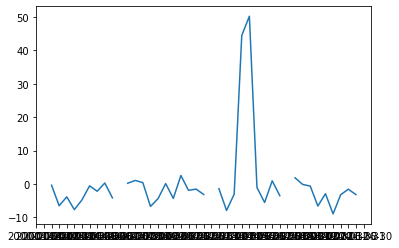

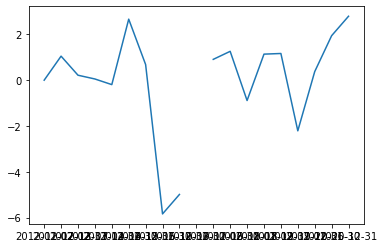

In [120]:
for i in range(1,num_columns,1):
    plt.figure()
    plt.plot(df['Date'],df[df.columns[i]])
    plt.show()

We can then do test such as the Dickey fuller test or a unit root test to see if true is truely staionary. <br> This is ow appropriate to feed into VARIMA Models

In [121]:
#Set Date to Datetime format
df['Date'] = pd.to_datetime(df['Date'])

 ## VAR
 
 Before going straight to VARIMA I am going to implement VAR to gather an inital understanding.
 <br> First theres two components we need to think about the first is getting the lag for the time series we are trying to predict (EBITDA) and the other time series (Shipping, Geographical, Operational Cost ...) that are used in our prediction. 

In this example
<br> df1 -->time series we are trying to predict --> EBITDA
<br> df2 -->time series helping our prediction   --> Shipping Costs, Geogrphical, Operational Costs

In [122]:

#VAR_df = df.set_index('Date')
#num_columns = len(VAR_df.columns)
#VAR_df = VAR_df.dropna()
#VAR_df
#Split the data into traing and testing data
#length_VAR_df = len(VAR_df)
#test_VAR_length = round(len(VAR_df)*(1/test_train_div))
#train_VAR_length= len(VAR_df) - test_VAR_length 
#VAR_train = VAR_df[:train_VAR_length]
#VAR_test = VAR_df[train_VAR_length:]


In [123]:

## PACF - partical AutoCorrelation 
#num_lags=round((len(VAR_train['EBITDA'])/2)-1.5)
#plot_pacf(VAR_train['EBITDA'],lags = num_lags,method='ywm')
#plt.show()    


Getting the correlation between df1 and df2.

In [124]:
#shows all lags between 1-num lags and printing their corelation and p-value between the two
#lag in this example is the months

#for i in range(1,num_columns,1):
#    print("\n --------------------"+str(VAR_train.columns[i])+" corelation and p value \n --------------------")
#    for lag in range(1,num_lags+1):
#        EBITDA_lag = VAR_train['EBITDA'].iloc[lag:]
#        Feature_lag = VAR_train[VAR_train.columns[i]].iloc[:-lag]
#        print('Lag: %s'%lag)
#        print(pearsonr(EBITDA_lag,Feature_lag))
#        print('----------')
   
#Look for the smallest p value and the largest coreelation 
#1 lag = 1 time period
#order = correlation, p-value 

Fitting VAR Model

In [125]:
#VAR_model = VAR(VAR_train)

In [126]:
#VAR_fit = VAR_model.fit(maxlags = 3) 

In [127]:
#VAR_fit.summary()
#lag_order = VAR_fit.k_ar
#print(lag_order)
#VAR_fit.forecast(y=VAR_df[-lag_order:], steps=10)
#gives a table of results, we have not specified a heater. It treats them equally, there for we have two tabels below.
#Treats the two as the main series we want to predict
#Look down the prob coloum where is it small (<0.5), the lags in this category should tell us what lags are 
#important (We already knwo this)

So the <b>VAR model</b> is 

Gather the coeficients aboove associated with their lags.

i.e.
<br><b>1st_coef = coefient above that links to the first lag that its probability is below 0.5</b>
<br><b>1st_lag =  lets say 3 lag is the first lag with probability below 0.5, then we would get the data pinot from 3 periods ago</b>

<br>
<center><b>y_hat</b> = 1st_coef*1st_lag + 2nd_coef*2nd_lag + 3rd_coef*3rd_lag + ....</center>

Calculate the errors. Absolute difference and Mean squared error

In [128]:
#SHIP = VAR_df[VAR_df.columns[1]]
#EBITDA = VAR_df[VAR_df.columns[0]]
#y_hat = L1_Ship*(0.15) + L2_EBITD*(-0.32) + L3_Ship*(-0.24)
#y_hat_array = np.array(VAR_train['EBITDA'])
#print("Before")
#print(len(y_hat_array))
#for period in range(train_VAR_length,length_VAR_df,1):
    #Main Equations
    #y_hat = SHIP[period-1]*(0.15) + EBITDA[period-2]*(-0.32) + SHIP[period-3]*(-0.24) + EBITDA[period-3]*(-0.3) 
    #y_hat_array = np.append(y_hat_array,y_hat)

#predicted_df = VAR_df
#predicted_df['predicated'] = y_hat_array.tolist()
#predicted_df

In [129]:
#plt.figure(figsize=(8, 4), dpi=80)
#plt.plot(predicted_df.index,predicted_df['EBITDA'], 'b-',label="Actual")
#plt.plot(predicted_df.index,predicted_df['predicated'],'r--', label="Predicted")
#plt.xlabel('Date')
#plt.ylabel('Normalized EBITDA')
#plt.title(company_name + ' EBITDA Value vs VARMA predicted Value')
#plt.legend()
#plt.show()


## VARMA

Adding the moving average to the VAR model 

In [130]:
temp2_df = inital_df.set_index('Date')
print(len(temp2_df.dropna()))
print(temp2_df)
#temp2_df = temp2_df.dropna()
print(len(temp2_df))
#df = df.drop(columns = ['LMAHDS03_LME_Comdty_PX_LAST','CL1_COMB_Comodity_PX_LAST',])
print(len(temp2_df.columns))

reduced_form, inds = sympy.Matrix(temp2_df.values).rref()


print(len(inds))
independent_columns = np.array([])
for c in inds:
    independent_columns = np.append(independent_columns, temp2_df.columns[c])
print(independent_columns)
temp2_df = temp2_df.loc[:,independent_columns]

18
              EBITDA  LMCADS03_LME_Comdty_PX_LAST  \
Date                                                
2000-01-04       NaN                          NaN   
2000-06-30       NaN                          NaN   
2001-01-01  0.877472                     0.200274   
2001-07-02  0.108190                    -1.170625   
2001-12-31 -0.199060                    -2.041113   
2002-07-01 -0.486448                     0.730630   
2002-12-31  0.679203                    -1.910491   
2003-06-30 -2.158560                    -1.481937   
2003-12-31  0.364910                     0.571755   
2004-06-30  0.770392                    16.341062   
2004-12-31  0.465435                    18.394754   
2005-06-30       NaN                          NaN   
2006-01-02  0.156604                     1.113542   
2006-06-30  1.145678                     1.173006   
2007-01-01 -1.280230                    -1.421957   
2007-07-02  1.165663                     1.017457   
2007-12-31 -0.972042                    -1.

In [156]:
#VARMA_df =temp2_df

df = inital_df
VARMA_df = inital_df.set_index('Date')
num_columns = len(VARMA_df.columns)
#VARMA_df = VARMA_df.dropna()
VARMA_df

#Split the data into traing and testing data
length_VARMA_df = len(VARMA_df)
test_VARMA_length = round(len(VARMA_df)*(1/test_train_div))
train_VARMA_length= len(VARMA_df) - test_VARMA_length 
VARMA_train = VARMA_df[:train_VARMA_length]
VARMA_test = VARMA_df[train_VARMA_length:]

num_lags=round((len(VARMA_train['EBITDA'])/2)-1.5)


In [132]:
#cov_df = VARMA_train.reset_index()
#cov_df = cov_df.drop(columns = 'Date')
#print(cov_df.columns[:4])

In [133]:

#print(np.linalg.eigvals(cov_df.cov))
#eig = np.linalg.eig(np.cov(cov_df.to_numpy()))
#print("\nlength of eig = " + str(len(eig[0])))
#print("\ncontents of eig = " + str(eig[0]))
#print("\nlength of eig index 1 = " + str(eig[0][1]))
#print("\nnum_columns = " + str(num_columns))
#print("\nVARMA_train.columns = " + str(VARMA_train.columns))
#print("\ncov_df columns = " + str((cov_df.columns)))
#print("\n eig[0][numcolumns - x]= " + str(eig[0][num_columns-3]))
#print("temp_df.column[-1]"+str(temp_df.columns[-1]))

In [134]:
#temp_df = cov_df

#print(temp_df.columns)
#print(temp_df[temp_df.columns[:2]])
#def checkForNeg(array):
    #print(array)
    #neg= False
    #for i in range(len(array)):
    #    if array[i]<0:
    #        neg=True
    #return neg

#i = 2
#while(i != num_columns-2):
#    test_df = temp_df[temp_df.columns[:i]] 
#    print(test_df)
    #eig_2 = np.linalg.eigvals(np.cov(test_df.to_numpy()))
    #includesNegEig = checkForNeg(eig_2[0])
#    if np.all(np.linalg.eigvals(np.cov(test_df.to_numpy())) > 0) :
#        i=i+1
#    else:
#        print("Dropped "+str(temp_df.columns[i-1]))
        #print("\n Before \n")
        #print(temp_df)
        #temp_df = temp_df.drop(columns = temp_df.columns[i-1])
        #print("\n New \n")
        #print(temp_df)

        
#print("\ntemp_df")
#print(len(temp_df.columns))

In [135]:
#print(temp_df.corr())
#i=0

#for i in range(1,num_columns,1):
#    print(str(temp_df.columns[i]))
#    print(temp_df['EBITDA'].corr(temp_df[temp_df.columns[i]]))
#    if i <20 :
#        print("Eigen Value: "+str(eig[0][i]))
#        if eig[0][i] < 0:
#            changed_df = changed_df.drop(columns = temp_df.columns[i]) 
#            print("Dropped")
#    print("\n")
    
    
#for i in range(1,num_columns,1):
#    is_corralted = True
#    if (VARMA_train['EBITDA'].corr(VARMA_train[VARMA_train.columns[i]]) <0.5):
#        is_corralted = False
        

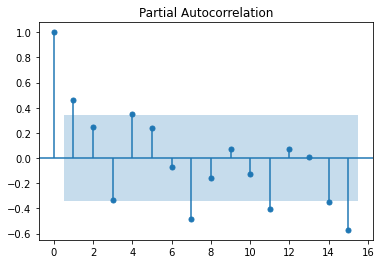

In [157]:
#PACF for the Autoregression p value
num_lags=round((len(VARMA_train['EBITDA'])/2)-1.5)
plot_pacf(VARMA_train['EBITDA'],lags = num_lags)
plt.show()

Adding the moving average

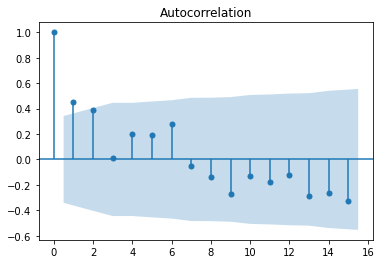

In [158]:
#ACF for the Moving Average q value
plot_acf(VARMA_train['EBITDA'],lags = num_lags)
plt.show()

In [146]:
#print(str(min(VARMA_train.index.date)))
#print(str(max(VARMA_train.index.date)))
#print(input_columns_without_date)

AttributeError: 'Index' object has no attribute 'date'

In [177]:
#Make model
#order=(AR p value, MA q value))
#endog = VARMA_train.loc[str(min(VARMA_train.index.date)):str(max(VARMA_train.index.date)), ['dln_inv', 'dln_inc', 'dln_consump']]
#endog = VARMA_train.loc[str(min(VARMA_train.index.date)):str(max(VARMA_train.index.date)), input_columns_without_date]
#(VARMA_train.values / VARMA_train.values.std(0)
input_columns
VARMA_model = VARMAX(VARMA_train, order=(1,0))

G:\Anaconda\envs\pythonProject1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


The cell below wont run unless the model is a positive definite. This mean there need to be no linear dependancies amounts the variables

In [172]:
VARMA_train

,EBITDA,LMCADS03_LME_Comdty_PX_LAST,LMNIDS03_LME_Comdty_PX_LAST,LTBMPRIN_Index_PX_LAST,Inflation Rate,SPX500 Index PX_LAST,SPX500 Index PX_VOLUME,GUKG10 Index PX_LAST,Shipping costs_Shipping costs
Date,,,,,,,,,
2000-01-04,1118,1169.92932,5250.27881,100.00,1.1,1399.42,1.072386e+09,5.662,998.2346
2000-06-30,1438,1180.81665,5310.37646,100.00,0.8,1454.60,1.258792e+09,5.171,998.2346
2001-01-01,1858,1223.13721,4559.14844,100.00,0.8,1320.28,1.318392e+09,4.881,998.2346
2001-07-02,1843,1108.59253,4278.52930,100.00,1.7,1236.71,1.256211e+09,5.302,998.2346
2001-12-31,1813,1023.74707,3848.54346,100.00,1.1,1148.08,1.089302e+09,5.054,998.2346
2002-07-01,1649,1104.12988,4686.17041,100.00,0.6,968.65,1.590400e+09,5.010,998.2346
2002-12-31,1840,968.64325,4427.19629,100.00,1.7,879.82,1.084224e+09,4.374,998.2346
2003-06-30,1632,1001.33105,4967.32813,100.00,1.1,974.50,1.353031e+09,4.157,998.2346
2003-12-31,1728,1290.23218,9251.99023,100.00,1.3,1111.92,8.362977e+08,4.802,998.2346


In [178]:
#Fit Model 
#if is_corralted:
VARMA_fit = VARMA_model.fit(disp=False)
VARMA_fit.summary()
#else:
    #print("Features are not strongly correlated")


G:\Anaconda\envs\pythonProject1\lib\site-packages\statsmodels\tsa\statespace\varmax.py:374: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


LinAlgError: Schur decomposition solver error.

Predictiing beyound our sample

In [176]:
#step = time steps beyound sample
prediction_steps = length_VARMA_df-train_VARMA_length
yhat_VARMA = VARMA_fit.forecast(steps=(prediction_steps))
yhat_VARMA
print(yhat_VARMA[0])

[ 0.76221321  2.02208874  1.93809912 15.22991265  0.73230401  5.27035036
  1.89365885  2.2344625   5.28180669]


In [175]:
#Plot the test data againt the predicted data
y_hat_array = np.array(VARMA_train['EBITDA'])
print("Before")
print(len(y_hat_array))
print(length_VARMA_df-train_VARMA_length)
for period in range(train_VARMA_length,length_VARMA_df,1):
    #Main Equations
    print(period)
    print(yhat_VARMA['EBITDA'][period])
    y_hat_array = np.append(y_hat_array,yhat_VARMA['EBITDA'][period])

predicted_VARMA_df = VARMA_df
predicted_VARMA_df['predicated'] = y_hat_array.tolist()
predicted_VARMA_df

Before
33
11
33


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
plt.figure(figsize=(8, 4), dpi=80)
plt.plot(predicted_VARMA_df.index,predicted_VARMA_df['EBITDA'], 'b-',label="Actual")
plt.plot(predicted_VARMA_df.index,predicted_VARMA_df['predicated'],'r--', label="Predicted")
plt.xlabel('Date')
plt.ylabel('Normalized EBITDA')
plt.title(company_name + ' EBITDA Value vs VARMA predicted Value')
plt.legend()
plt.show()